<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/datablock_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
path = untar_data(URLs.MNIST_TINY)
path.ls()

[PosixPath('/root/.fastai/data/mnist_tiny/valid'),
 PosixPath('/root/.fastai/data/mnist_tiny/test'),
 PosixPath('/root/.fastai/data/mnist_tiny/train'),
 PosixPath('/root/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_tiny/models')]

In [0]:
data = ImageList.from_folder(path).split_by_folder().label_from_folder().transform(get_transforms(), size = 128).databunch()

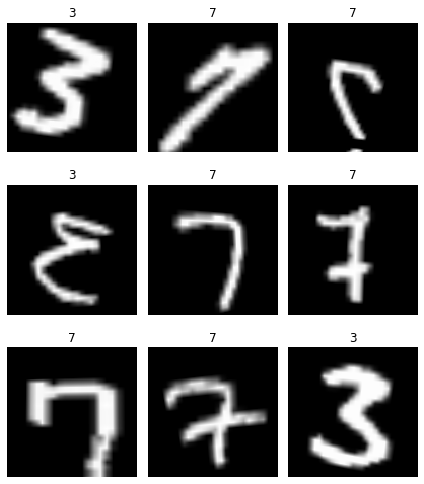

In [0]:
data.show_batch(rows = 3, figsize = (6, 7))

In [0]:
path = untar_data(URLs.PLANET_TINY)
path.ls()

[PosixPath('/root/.fastai/data/planet_tiny/train'),
 PosixPath('/root/.fastai/data/planet_tiny/labels.csv')]

In [0]:
(path/'train').ls()[:3]

[PosixPath('/root/.fastai/data/planet_tiny/train/train_11177.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_23873.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_27893.jpg')]

In [0]:
df = pd.read_csv(path/'labels.csv')

In [0]:
df[:3]

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water


In [0]:
src = ImageList.from_csv(path, 'labels.csv', folder = 'train', suffix = '.jpg').split_by_rand_pct().label_from_df(label_delim = ' ')

In [0]:
tfms = get_transforms(flip_vert = True, max_lighting=0.1, max_zoom = 0.1, max_warp=0.)

In [0]:
data = src.transform(tfms, size = 128).databunch()

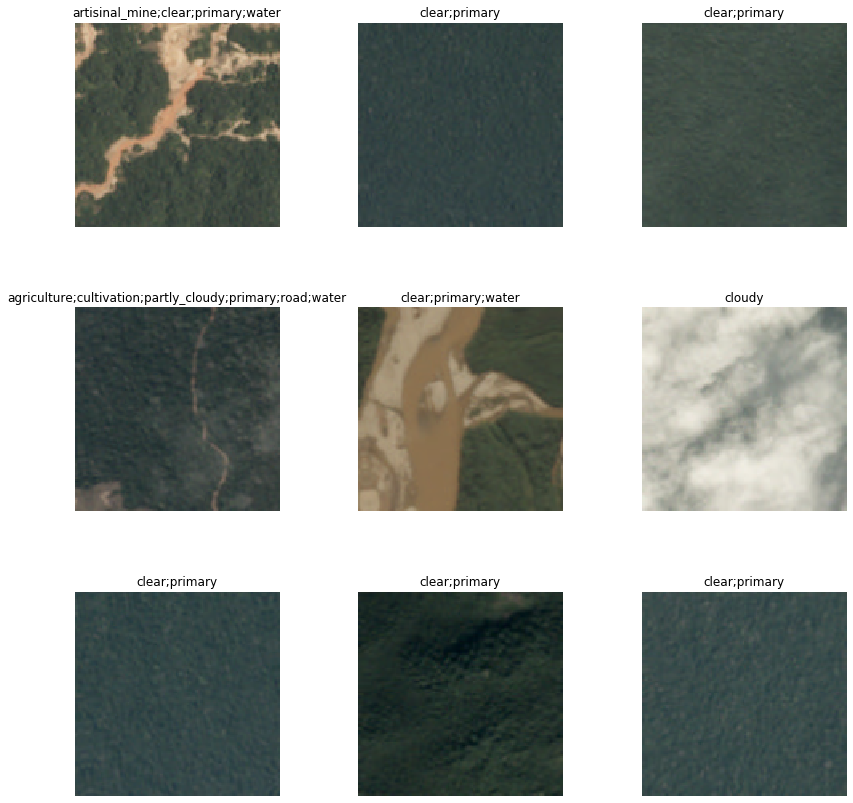

In [0]:
data.show_batch(rows = 3)

In [0]:
path = untar_data(URLs.CAMVID)

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/valid.txt')]

In [0]:
(path/'labels').ls()[:3]

[PosixPath('/root/.fastai/data/camvid/labels/0001TP_006960_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f03540_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_008970_P.png')]

In [0]:
(path/'images').ls()[:3]

[PosixPath('/root/.fastai/data/camvid/images/0006R0_f02670.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f04050.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_04500.png')]

In [0]:
path_lbl = path/'labels'
get_label = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [0]:
path_img = path/'images'
get_label(path_img.ls()[0])

PosixPath('/root/.fastai/data/camvid/labels/0006R0_f02670_p.png')

In [0]:
codes = np.loadtxt(path/'codes.txt', dtype = str)

In [0]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [0]:
src = SegmentationItemList.from_folder(path_img).split_by_rand_pct().label_from_func(get_label, classes = codes)

In [0]:
src

LabelLists;

Train: LabelList (561 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (140 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Test: None

In [0]:
data = src.transform(get_transforms(), tfm_y = True, size = 128).databunch()

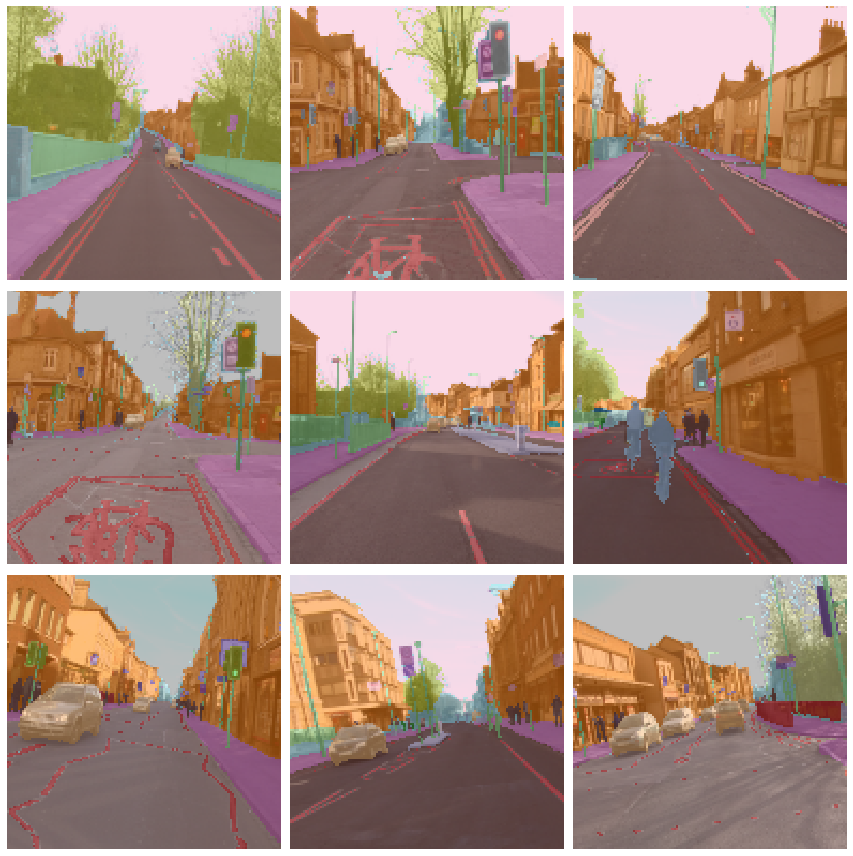

In [0]:
data.show_batch(rows = 3)

In [0]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/biwi_head_pose/23'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07'),
 PosixPath('/root/.fastai/data/biwi_head_pose/15.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/01'),
 PosixPath('/root/.fastai/data/biwi_head_pose/02'),
 PosixPath('/root/.fastai/data/biwi_head_pose/19.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/21.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/10.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/15'),
 PosixPath('/root/.fastai/data/biwi_head_pose/21'),
 PosixPath('/root/.fastai/data/biwi_head_pose/23.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/05'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/04.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/16'),
 PosixPath('/root/.fastai/data/biwi_head_pose/02.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/12.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/22'),
 PosixPath('/root/.fastai/da

In [0]:
np.loadtxt(path/'19'/'frame_00060_pose.txt', dtype = str)

array([['0.758991', '-0.0354791', '0.650134'],
       ['-0.141503', '0.96566', '0.217894'],
       ['-0.635539', '-0.257375', '0.727907'],
       ['9.66177', '127.916', '1179.24']], dtype='<U10')

In [0]:
(path/'01').ls()[:4]

[PosixPath('/root/.fastai/data/biwi_head_pose/01/frame_00388_rgb.jpg'),
 PosixPath('/root/.fastai/data/biwi_head_pose/01/frame_00280_rgb.jpg'),
 PosixPath('/root/.fastai/data/biwi_head_pose/01/frame_00060_pose.txt'),
 PosixPath('/root/.fastai/data/biwi_head_pose/01/frame_00446_rgb.jpg')]

IsADirectoryError: ignored